In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import functions as fc

df = pd.read_csv("/work/aavocone/large_set.csv")


#test train split
X = df[df.columns[:-3]]    #exclude "signal" "classification" "B_sig_isSignalAcceptMissingNeutrino"
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5)

model50 = xgb.XGBClassifier()
model50.load_model("/work/aavocone/models/model50.txt")
y50_train = model50.predict_proba(xtrain)[:,1]
y50 = model50.predict_proba(xtest)[:,1]

model100 = xgb.XGBClassifier()
model100.load_model("/work/aavocone/models/model100.txt")
y100_train = model100.predict_proba(xtrain)[:,1]
y100 = model100.predict_proba(xtest)[:,1]

model200 = xgb.XGBClassifier()
model200.load_model("/work/aavocone/models/model200.txt")
y200_train = model200.predict_proba(xtrain)[:,1]
y200 = model200.predict_proba(xtest)[:,1]

model500 = xgb.XGBClassifier()
model500.load_model("/work/aavocone/models/model500.txt")
y500_train = model500.predict_proba(xtrain)[:,1]
y500 = model500.predict_proba(xtest)[:,1]


#efficiency
sh50_train,bh50_train,s50_train,b50_train,bin_edges = fc.efficiency(y50_train,ytrain)
sh50,bh50,s50,b50,bin_edges = fc.efficiency(y50,ytest)

sh100_train,bh100_train,s100_train,b100_train,bin_edges = fc.efficiency(y100_train,ytrain)
sh100,bh100,s100,b100,bin_edges = fc.efficiency(y100,ytest)

sh200_train,bh200_train,s200_train,b200_train,bin_edges = fc.efficiency(y200_train,ytrain)
sh200,bh200,s200,b200,bin_edges = fc.efficiency(y200,ytest)

sh500_train,bh500_train,s500_train,b500_train,bin_edges = fc.efficiency(y500_train,ytrain)
sh500,bh500,s500,b500,bin_edges = fc.efficiency(y500,ytest)


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


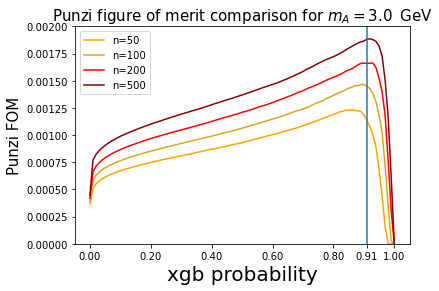

In [12]:
#ponzi
def PFOM(seff,beff,bhist,n):
    return seff/(np.sqrt(beff*sum(bhist))+n/2)

bin_edges = np.linspace(0,1,101)

plt.plot(bin_edges, PFOM(s50,b50,bh50,5), label = "n=50", color ="orange")
plt.plot(bin_edges, PFOM(s100,b100,bh100,5), label = "n=100", color ="goldenrod")
plt.plot(bin_edges, PFOM(s200,b200,bh200,5), label = "n=200", color ="red")
plt.plot(bin_edges, PFOM(s500,b500,bh500,5), label = "n=500", color ="darkred")
plt.plot([0.91,0.91],[0,0.002],color="tab:blue")
plt.title("Punzi figure of merit comparison for $m_A = 3.0\:$ GeV",fontsize=15)
plt.ylabel("Punzi FOM",fontsize=15)
plt.ylim(0,0.002)
plt.xlabel("xgb probability", fontsize = 20)
plt.xticks([0,0.2,0.4,0.6,0.8,0.91,1.0])
plt.legend()
plt.savefig(f"/work/aavocone/week5/large_PFOM3.pdf", format="pdf",bbox_inches="tight")
plt.show()

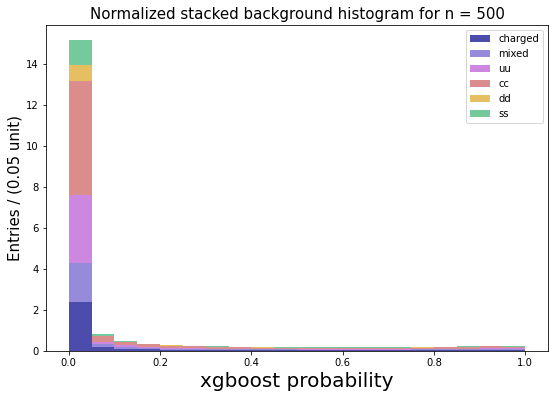

In [4]:
fc.stacked_hist(df,y500,ytest,"/work/aavocone/week5/stacked_hist_n500.pdf",np.linspace(0,1,21))
